# Pesquisa de mercado

## Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns 

### Processamento dos dados

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [3]:
rest_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
rest_data['chain'] = rest_data['chain'].astype(bool) # convertendo coluna para booleano
print(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB
None


In [5]:
duplicated = rest_data.duplicated().sum()  # verificando valores duplicados e nulos

print(duplicated)
print(rest_data.isnull().sum())

0
id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


In [6]:
# Contagem de valores nulos
missing_count = rest_data['chain'].isnull().sum()
missing_percentage = (missing_count / len(rest_data)) * 100

print(f"Valores nulos em 'chain': {missing_count} ({missing_percentage:.2f}%)")

Valores nulos em 'chain': 0 (0.00%)


### Investigando proporções dos estabelecimentos

Restaurant    0.751736
Fast Food     0.110455
Cafe          0.045073
Pizza         0.033157
Bar           0.030256
Bakery        0.029323
Name: object_type, dtype: float64


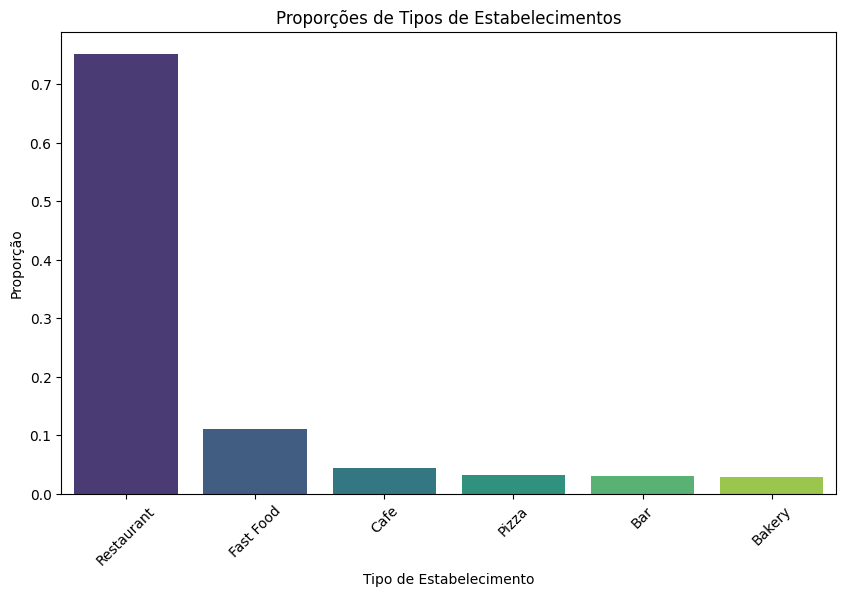

In [7]:
# Calcular proporções
type_counts = rest_data['object_type'].value_counts(normalize=True)

print(type_counts)
# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.title("Proporções de Tipos de Estabelecimentos")
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Proporção")
plt.xticks(rotation=45)
plt.show()

### Proporções rede e não rede

False    0.618796
True     0.381204
Name: chain, dtype: float64


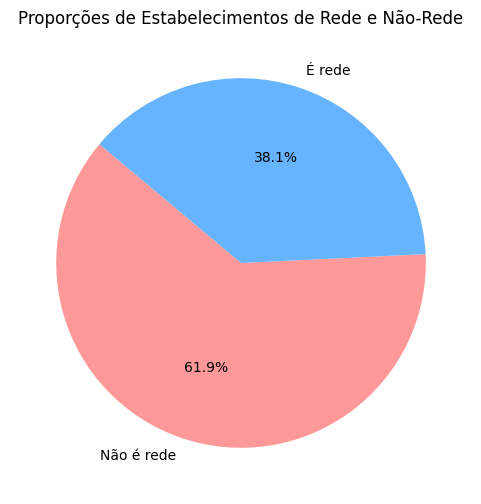

In [8]:
# Proporções de estabelecimentos de rede e não rede
chain_counts = rest_data['chain'].value_counts(normalize=True)

print(chain_counts)

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(chain_counts, labels=["Não é rede", "É rede"], autopct='%1.1f%%', startangle=140, colors=["#ff9999","#66b3ff"])
plt.title("Proporções de Estabelecimentos de Rede e Não-Rede")
plt.show()

### Tipo de estabelecimento típico para redes

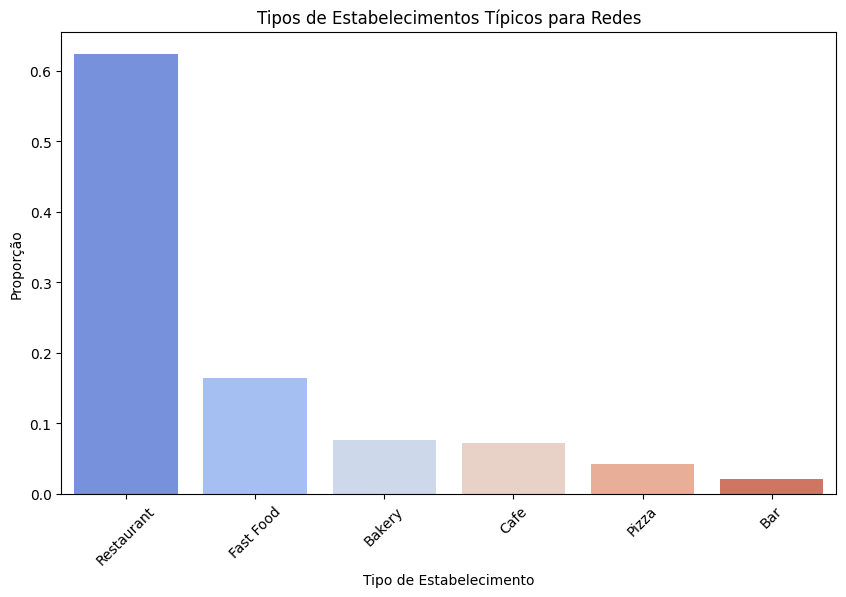

In [9]:
# Filtrar estabelecimentos que são de rede
chain_types = rest_data[rest_data['chain'] == True]['object_type'].value_counts(normalize=True)

# Gráfico de barras para tipos de redes
plt.figure(figsize=(10, 6))
sns.barplot(x=chain_types.index, y=chain_types.values, palette="coolwarm")
plt.title("Tipos de Estabelecimentos Típicos para Redes")
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Proporção")
plt.xticks(rotation=45)
plt.show()

### O que caracteriza as redes

chain
False    46.171467
True     39.675455
Name: number, dtype: float64


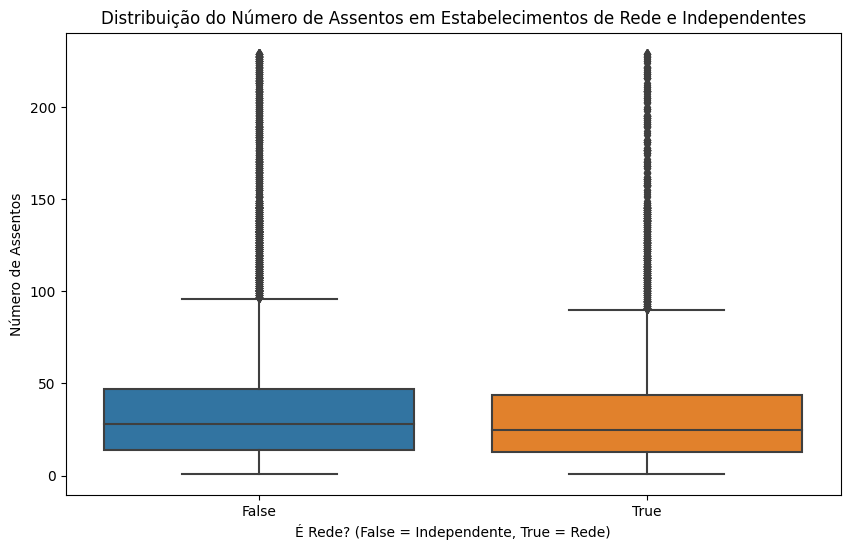

In [10]:
# Comparar número médio de assentos em estabelecimentos de rede e não rede
mean_seats_chain = rest_data.groupby('chain')['number'].mean()

print(mean_seats_chain)

plt.figure(figsize=(10, 6))

# Criando o boxplot
sns.boxplot(data=rest_data, x='chain', y='number')

# Adicionando título e rótulos
plt.title('Distribuição do Número de Assentos em Estabelecimentos de Rede e Independentes')
plt.xlabel('É Rede? (False = Independente, True = Rede)')
plt.ylabel('Número de Assentos')

# Exibindo o gráfico
plt.show()

chain_label
Independente    46.171467
Rede            39.675455
Name: number, dtype: float64


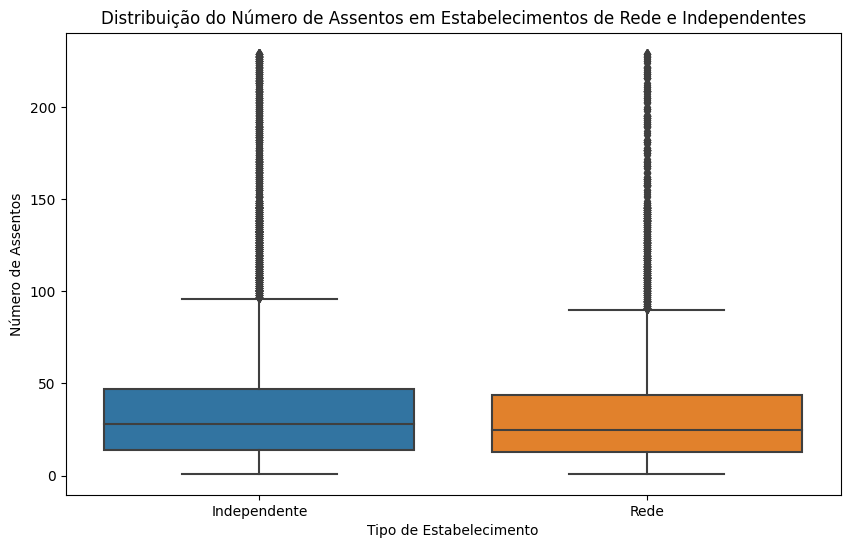

In [11]:
##Código gerado pela revisoa 
import seaborn as sns
import matplotlib.pyplot as plt

# Substituindo True/False por "rede" e "independente"
rest_data['chain_label'] = rest_data['chain'].map({True: 'Rede', False: 'Independente'})

# Comparar número médio de assentos em estabelecimentos de rede e não rede
mean_seats_chain = rest_data.groupby('chain_label')['number'].mean()

print(mean_seats_chain)

plt.figure(figsize=(10, 6))

# Criando o boxplot usando a nova coluna 'chain_label'
sns.boxplot(data=rest_data, x='chain_label', y='number')

# Adicionando título e rótulos
plt.title('Distribuição do Número de Assentos em Estabelecimentos de Rede e Independentes')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Número de Assentos')

# Exibindo o gráfico
plt.show()


### Número médio de assentos

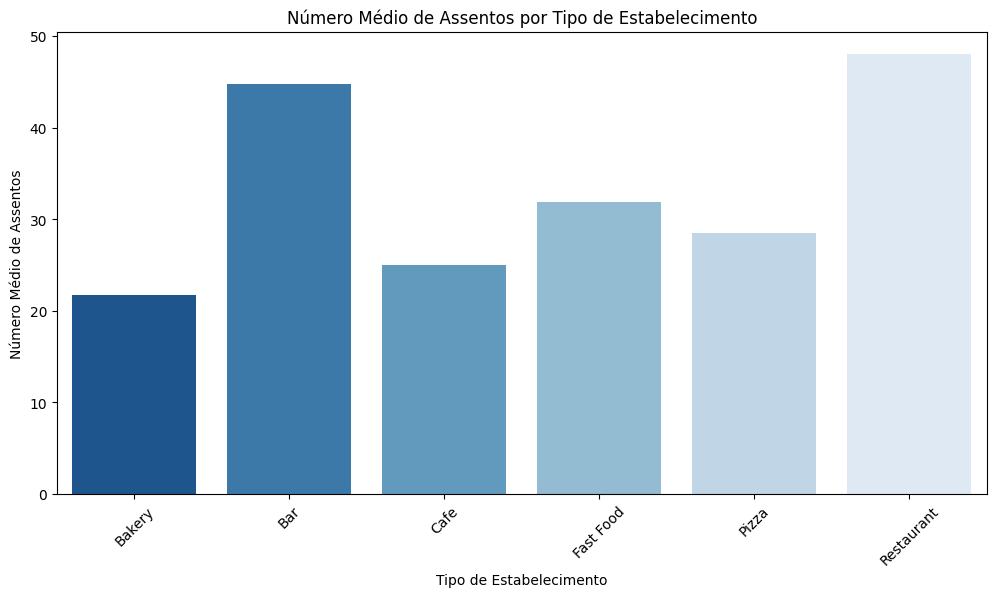

O tipo de estabelecimento com o maior número médio de assentos é: Restaurant


In [16]:
# Número médio de assentos por tipo de estabelecimento
mean_seats_type = rest_data.groupby('object_type')['number'].mean()

# Gráfico de barras para número médio de assentos por tipo de estabelecimento
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_seats_type.index, y=mean_seats_type.values, palette="Blues_r")
plt.title("Número Médio de Assentos por Tipo de Estabelecimento")
plt.xlabel("Tipo de Estabelecimento")
plt.ylabel("Número Médio de Assentos")
plt.xticks(rotation=45)
plt.show()

# Tipo com o maior número médio de assentos
max_seat_type = mean_seats_type.idxmax()
print(f"O tipo de estabelecimento com o maior número médio de assentos é: {max_seat_type}")

### Nome das ruas em coluna separada

In [17]:
# Extraindo o nome da rua, removendo o número inicial
rest_data['street_name'] = rest_data['address'].str.replace(r'^\d+\s+', '', regex=True)

# Exibindo as primeiras linhas para verificar o resultado
print(rest_data[['address', 'street_name']].head())

                   address         street_name
0   3708 N EAGLE ROCK BLVD   N EAGLE ROCK BLVD
1        100 WORLD WAY 120       WORLD WAY 120
2  6801 HOLLYWOOD BLVD 253  HOLLYWOOD BLVD 253
3       1814 W SUNSET BLVD       W SUNSET BLVD
4       2100 ECHO PARK AVE       ECHO PARK AVE


### Gráfico das dez ruas com maior número de restaurantes

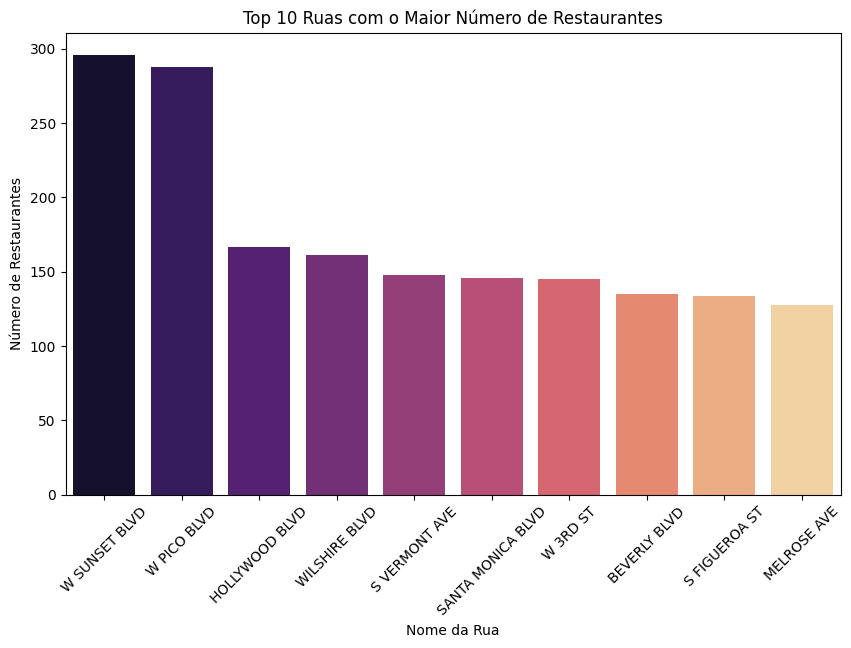

In [18]:
# Contar o número de estabelecimentos por rua
top_streets = rest_data['street_name'].value_counts().head(10)

# Gráfico de barras para as 10 ruas com mais restaurantes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_streets.index, y=top_streets.values, palette="magma")
plt.title("Top 10 Ruas com o Maior Número de Restaurantes")
plt.xlabel("Nome da Rua")
plt.ylabel("Número de Restaurantes")
plt.xticks(rotation=45)
plt.show()

### Contar ruas com apenas um restaurante

In [19]:
# Contar o número de ruas com apenas um restaurante
one_restaurant_streets = rest_data['street_name'].value_counts()
single_restaurant = (one_restaurant_streets == 1).sum()

print(f"Número de ruas com apenas um restaurante: {single_restaurant}")

Número de ruas com apenas um restaurante: 2450


### Tendências

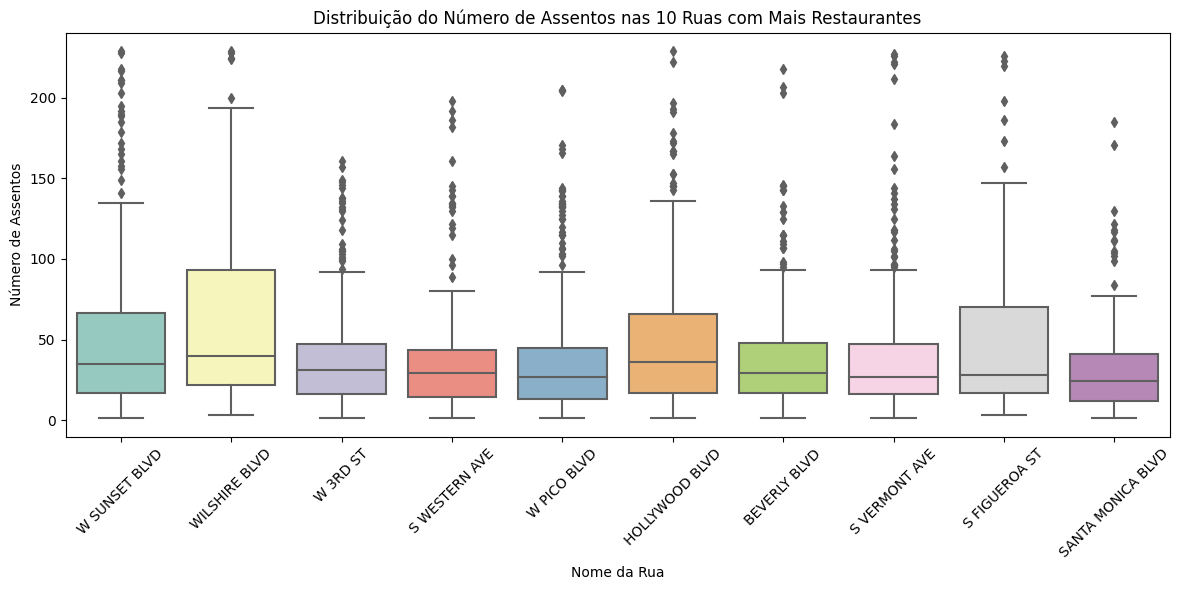

In [20]:
# Filtrar ruas com muitos restaurantes (10 ou mais)
high_count_streets = one_restaurant_streets[one_restaurant_streets >= 10].index
many_restaurants = rest_data[rest_data['street_name'].isin(high_count_streets)]

# Calcular a contagem de restaurantes por rua
restaurant_counts = many_restaurants['street_name'].value_counts()

# Selecionar as 10 ruas com mais restaurantes
top_streets = restaurant_counts.head(10).index
filtered_restaurants = many_restaurants[many_restaurants['street_name'].isin(top_streets)]

# Boxplot da distribuição de assentos nessas ruas
plt.figure(figsize=(12, 6))
sns.boxplot(x='street_name', y='number', data=filtered_restaurants, palette="Set3")
plt.title("Distribuição do Número de Assentos nas 10 Ruas com Mais Restaurantes")
plt.xlabel("Nome da Rua")
plt.ylabel("Número de Assentos")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

### Conclusão

Com base na análise dos dados de restaurantes, observou-se que os estabelecimentos independentes (não de rede) tendem a ter uma média de assentos maior (46,17) em comparação com as redes (39,68). Isso sugere que os restaurantes independentes oferecem uma experiência mais ampla e confortável, possivelmente visando atender a um público que busca um ambiente mais acolhedor ou diversificado. Por outro lado, as redes de restaurantes, que têm uma média menor de assentos, podem estar mais focadas em modelos de negócio que priorizam eficiência e rapidez, como os fast foods e cafés. 
Para novos empreendimentos, recomenda-se considerar a abertura de um restaurante independente com um foco em um ambiente acolhedor e uma oferta diversificada.
Um número médio de assentos que varia entre 30 a 50 pode ser ideal. Isso permite acomodar um fluxo razoável de clientes, proporcionando conforto e uma boa experiência de serviço, enquanto ainda se mantém flexível para se adaptar a diferentes volumes de clientes ao longo do dia.


In [22]:
Presentation: <https://1drv.ms/b/c/d3c5d6f332e43670/EWSmLdtZI0tKpICd4NktW1UBz7-HRxzA5G10kFf3BtD7Fw?e=Mzv0ao>


SyntaxError: invalid syntax (540334223.py, line 1)